In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I have chosen to look at NEVADA as my home state.

home_state = 'Nevada'

sat_2019 = pd.read_csv('sat_2019.csv', index_col='State') # no nulls in csv
sat_by_major_2019 = pd.read_csv('sat_2019_by_intended_college_major.csv')
sat_2018 = pd.read_csv('sat_2018.csv', index_col='State')
sat_2017 = pd.read_csv('sat_2017.csv', index_col='State')

# CLEANING SAT_2019 DATASET
# Remove Puerto Rico and Virgin Islands as they were not included in previous years' data.
sat_2019 = sat_2019.drop('Puerto Rico')
sat_2019 = sat_2019.drop('Virgin Islands')
# Strip the % sign from the Participation Rate column
def strip_percent_sign (str, axis=1):
    return str.replace("%", "")
    
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(strip_percent_sign)
# Convert Participation Rate column values into integer 
sat_2019 = sat_2019.astype({'Participation Rate':'int'})
# Rename columns to match dataframe name
sat_2019.rename(columns = {'Participation Rate':'Participation Rate (%) 2019','EBRW':'Average EBRW Score 2019','Math':'Average Math Score 2019','Total':'Average Total Score 2019'}, inplace=True)


# CLEANING SAT_BY_MAJOR_2019 DATASET
# Strip the ',' from the Test Takers column
def strip_comma(str, axis=1):
    return str.replace(",", "")
    
sat_by_major_2019['TestTakers'] = sat_by_major_2019['TestTakers'].apply(strip_comma)
# Convert TestTakers column values into integer 
sat_by_major_2019 = sat_by_major_2019.astype({'TestTakers':'int'})
# Strip the '%' sign from the Percent column
sat_by_major_2019['Percent'] = sat_by_major_2019['Percent'].apply(strip_percent_sign)
# Convert Percent column values into integer 
sat_by_major_2019 = sat_by_major_2019.astype({'Percent':'int'})
# Rename columns to make dataframe clearer
sat_by_major_2019.rename(columns = {'IntendedCollegeMajor':'Intended College Major','Percent':'Percent of Total TestTakers Choosing Major', 'Total':'Average Total SAT Score of Those Choosing Major' ,'ReadingWriting':'Average EBRW Score of Those Choosing Major', 'Math':'Average Math Score of Those Choosing Major'}, inplace=True)


# CLEANING SAT_2018 DATASET
# Strip the '%' sign from the Percent column
sat_2018['Participation'] = sat_2018['Participation'].apply(strip_percent_sign)
# Convert Participation column values into integer 
sat_2018 = sat_2018.astype({'Participation':'int'})
# Rename columns to match other datasets
sat_2018.rename(columns = {'Participation':'Participation Rate (%) 2018', 'Evidence-Based Reading and Writing':'Average EBRW Score 2018', 'Math':'Average Math Score 2018', 'Total':'Average Total Score 2018'}, inplace=True)


# CLEANING SAT_2017 DATASET
# Strip the '%' sign from the Percent column
sat_2017['Participation'] = sat_2017['Participation'].apply(strip_percent_sign)
# Convert Participation column values into integer 
sat_2017 = sat_2017.astype({'Participation':'int'})
# Rename columns to match other datasets
sat_2017.rename(columns = {'Participation':'Participation Rate (%) 2017', 'Evidence-Based Reading and Writing':'Average EBRW Score 2017', 'Math':'Average Math Score 2017', 'Total':'Average Total Score 2017'}, inplace=True)


# MERGING SAT_2017, SAT_2018 and SAT_2019
sat_17_18 = pd.merge(sat_2017, sat_2018, left_on='State', right_on='State', suffixes=(' 2017', ' 2018'))
sat_17_18_19 = pd.merge(sat_17_18, sat_2019, left_on='State', right_on='State') #, suffixes=('', ' 2019')


How do the states compare to eachother on SATs?
Which states have the best/worst SAT scores?
Which majors attract the best SAT scorers? 


How have the SATs changed over time? 
Look at the correlation between high ACT scores and which major students are applying for

Tech Debt
 - Move the 'Total' column in sat_by_major_2019 to the last column index to match the other datasets


In [ ]:
# sat_by_major_2019.head()
# sat_2017.head()
# sat_2018.head()
# sat_2019.head()

# sat_17_18_19.head(53)

In [62]:
# Creating a new dataframe containing the Participation Rates per year
sat_17_18_19_participation = sat_17_18_19[['Participation Rate (%) 2017', 'Participation Rate (%) 2018', 'Participation Rate (%) 2019']].copy()
# function to find the average Total Score over 3 years of each state
def three_year_participation_score(row):
    return int((row['Participation Rate (%) 2017'] + row['Participation Rate (%) 2018'] + row['Participation Rate (%) 2019'])/3)

sat_17_18_19_participation['Average Participation Rate Over 3 Years'] = sat_17_18_19_participation.apply(three_year_participation_score, axis=1)
# sort values and print statement 
sat_17_18_19_participation.sort_values('Average Participation Rate Over 3 Years', ascending=False, inplace=True)
print(f'The top 5 states for Participation Rates over three years 2017-2019 are {sat_17_18_19_participation.index[0]}, {sat_17_18_19_participation.index[1]}, {sat_17_18_19_participation.index[2]}, {sat_17_18_19_participation.index[3]} and {sat_17_18_19_participation.index[4]}')
sat_17_18_19_participation.head(5)

The top 5 states for Participation Rates over three years 2017-2019 are Michigan, Connecticut, Delaware, Idaho and Maine


,Participation Rate (%) 2017,Participation Rate (%) 2018,Participation Rate (%) 2019,Average Participation Rate Over 3 Years
State,,,,
Michigan,100,100,100,100
Connecticut,100,100,100,100
Delaware,100,100,100,100
Idaho,93,100,100,97
Maine,95,99,99,97


In [63]:
# What were the top 5 performing states in years 2017-2019, based on Average Total Score? 

# Creating a new dataframe containing the Average Total Score per year
sat_17_18_19_totals = sat_17_18_19[['Average Total Score 2017', 'Average Total Score 2018', 'Average Total Score 2019']].copy()
# function to find the average Total Score over 3 years of each state
def three_year_total_score(row):
    return int((row['Average Total Score 2017'] + row['Average Total Score 2018'] + row['Average Total Score 2019'])/3)

sat_17_18_19_totals['Average Total Score Over 3 Years'] = sat_17_18_19_totals.apply(three_year_total_score, axis=1)
# sort values and print statement 
sat_17_18_19_totals.sort_values('Average Total Score Over 3 Years', ascending=False, inplace=True)
print(f'The top 5 performing states over three years 2017-2019 are {sat_17_18_19_totals.index[0]}, {sat_17_18_19_totals.index[1]}, {sat_17_18_19_totals.index[2]}, {sat_17_18_19_totals.index[3]} and {sat_17_18_19_totals.index[4]}')
sat_17_18_19_totals.head(5)

The top 5 performing states over three years 2017-2019 are Minnesota, Wisconsin, North Dakota, Iowa and Missouri


,Average Total Score 2017,Average Total Score 2018,Average Total Score 2019,Average Total Score Over 3 Years
State,,,,
Minnesota,1295,1298,1284,1292
Wisconsin,1291,1294,1283,1289
North Dakota,1256,1283,1263,1267
Iowa,1275,1265,1244,1261
Missouri,1271,1262,1236,1256


In [64]:
# What were the bottom 5 performing states in years 2017-2019, based on Average Total Score? 

# sort values and print statement 
sat_17_18_19_totals.sort_values('Average Total Score Over 3 Years', ascending=True, inplace=True)
print(f'The top 5 performing states over three years 2017-2019 are {sat_17_18_19_totals.index[0]}, {sat_17_18_19_totals.index[1]}, {sat_17_18_19_totals.index[2]}, {sat_17_18_19_totals.index[3]} and {sat_17_18_19_totals.index[4]}')
sat_17_18_19_totals.head(5)

The top 5 performing states over three years 2017-2019 are District of Columbia, Delaware, Idaho, Michigan and West Virginia


,Average Total Score 2017,Average Total Score 2018,Average Total Score 2019,Average Total Score Over 3 Years
State,,,,
District of Columbia,950,977,975,967
Delaware,996,998,985,993
Idaho,1005,1001,993,999
Michigan,1005,1011,1003,1006
West Virginia,1086,999,943,1009


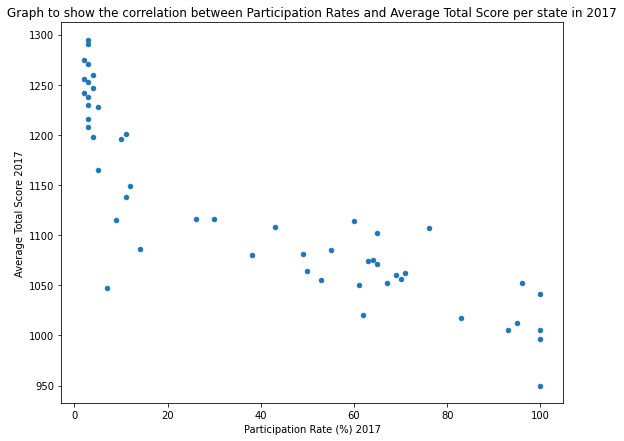

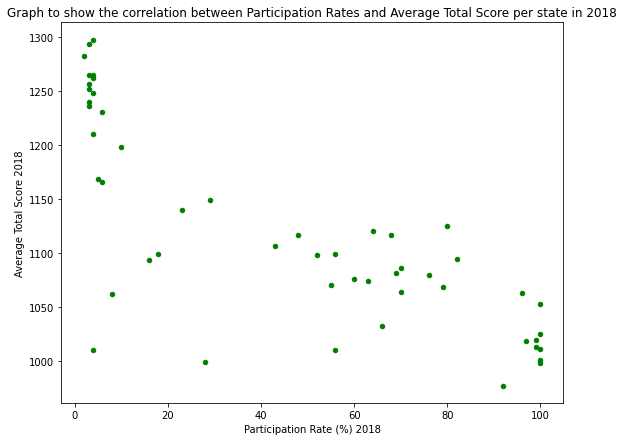

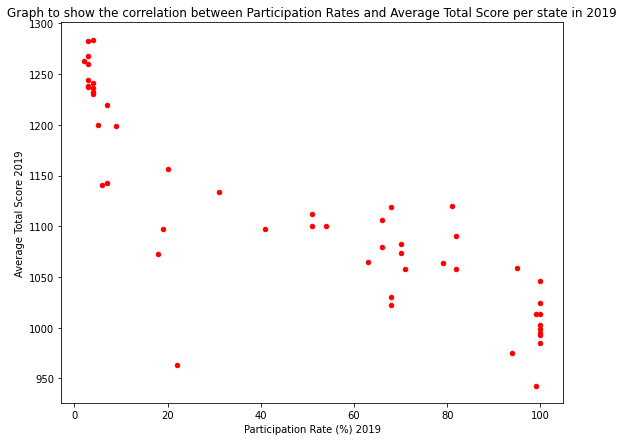

In [100]:
# Show the correlation between low participation rates, and right average total score for each year.
sat_participation_totalscore = pd.merge(sat_17_18_19_participation, sat_17_18_19_totals, left_on='State', right_on='State')

sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2017', y= 'Average Total Score 2017', figsize=(9,7), title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2017');
sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2018', y= 'Average Total Score 2018', figsize=(9,7), c='green', title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2018');
sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2019', y= 'Average Total Score 2019', figsize=(9,7), c='red', title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2019');

# There is a very faint correlation between Participation Rate and Average Total Score each year, with the correlation being strongest in 2017

In [93]:
# Participation Rates for 2017
sat_2017_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2017'].mean())
sat_2017_mean_participation
homestate_2017_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2017']

# Participation Rates for 2018
sat_2018_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2018'].mean())
sat_2018_mean_participation
homestate_2018_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2018']

# Participation Rates for 2019
sat_2019_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2019'].mean())
sat_2019_mean_participation
homestate_2019_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2019']

print(f'The mean Participation Rate in 2017 was {sat_2017_mean_participation}. The Partipation Rate for {home_state} in 2017 was {homestate_2017_participation}')
print(f'The mean Participation Rate in 2018 was {sat_2018_mean_participation}. The Partipation Rate for {home_state} in 2018 was {homestate_2018_participation}')
print(f'The mean Participation Rate in 2019 was {sat_2019_mean_participation}. The Partipation Rate for {home_state} in 2019 was {homestate_2019_participation}')

print(f'While the Participation Rate for the whole of the US has increased over the years from 2017 to 2019, the Participation Rate for {home_state} has decreased by {int(homestate_2019_participation - homestate_2017_participation)}%.')

The mean Participation Rate in 2017 was 39. The Partipation Rate for Nevada in 2017 was 26
The mean Participation Rate in 2018 was 45. The Partipation Rate for Nevada in 2018 was 23
The mean Participation Rate in 2019 was 49. The Partipation Rate for Nevada in 2019 was 20
While the Participation Rate for the whole of the US has increased over the years from 2017 to 2019, the Participation Rate for Nevada has decreased by -6%.


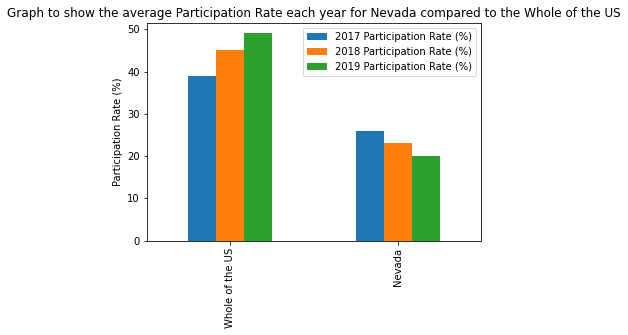

In [102]:
participation_rates = {
    '2017 Participation Rate (%)':[sat_2017_mean_participation, homestate_2017_participation],
    '2018 Participation Rate (%)':[sat_2018_mean_participation, homestate_2018_participation],
    '2019 Participation Rate (%)':[sat_2019_mean_participation, homestate_2019_participation],
}
index_labels = ['Whole of the US', 'Nevada']

participation_df = pd.DataFrame(participation_rates, index=index_labels)
participation_df.plot(kind='bar', ylabel='Participation Rate (%)', title='Graph to show the average Participation Rate each year for Nevada compared to the Whole of the US');